In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os as os
import missingno as msno
from scipy import stats

pd.set_option('display.max_columns', 100)
pd.set_option("display.max_columns", 100)

import warnings
warnings.simplefilter(action='ignore',)

In [155]:
fire_df = pd.read_csv('../data/WFIGS_-_Wildland_Fire_Locations_Full_History.csv')

In [156]:
fire_df.head()

X          Y  OBJECTID ABCDMisc ADSPermissionState  \
0 -105.563067  44.603340     96806      NaN            DEFAULT   
1 -117.076679  34.733894    165266      NaN            DEFAULT   
2 -116.216680  43.666673    138626      NaN            DEFAULT   
3 -111.426912  42.096336    165226      NaN            DEFAULT   
4 -112.072414  34.598306    111439      NaN            DEFAULT   

   CalculatedAcres ContainmentDateTime ControlDateTime  DailyAcres  \
0              NaN                 NaN             NaN         NaN   
1              NaN                 NaN             NaN         NaN   
2              NaN                 NaN             NaN         NaN   
3              NaN                 NaN             NaN        20.0   
4              NaN                 NaN             NaN         NaN   

   DiscoveryAcres DispatchCenterID  EstimatedCostToDate  \
0             NaN            WYCPC                  NaN   
1             NaN           CASBCC                  NaN   
2             NaN            IDBDC                  NaN   
3             1.0            IDEIC                  NaN   
4             NaN            AZPDC                  NaN   

   FinalFireReportApprovedByTitle FinalFireReportApprovedByUnit  \
0                             NaN                           NaN   
1                             NaN                           NaN   
2                             NaN                           NaN   
3                             NaN                           NaN   
4                             NaN                           NaN   

  FinalFireReportApprovedDate FireBehaviorGeneral FireBehaviorGeneral1  \
0                         NaN                 NaN                  NaN   
1                         NaN                 NaN                  NaN   
2                         NaN                 NaN                  NaN   
3                         NaN                 NaN                  NaN   
4                         NaN                 NaN                  NaN   

  FireBehaviorGeneral2 FireBehaviorGeneral3 FireCause FireCauseGeneral  \
0                  NaN                  NaN       NaN              NaN   
1                  NaN                  NaN       NaN              NaN   
2                  NaN                  NaN       NaN              NaN   
3                  NaN                  NaN   Unknown              NaN   
4                  NaN                  NaN   Unknown              NaN   

  FireCauseSpecific FireCode FireDepartmentID   FireDiscoveryDateTime  \
0               NaN     M8FR              NaN  2003/01/01 06:59:59+00   
1               NaN     A655              NaN  2004/07/06 01:04:00+00   
2               NaN     EC4U              NaN  2008/07/22 15:10:00+00   
3               NaN      NaN              NaN  2008/09/08 13:34:59+00   
4               NaN      NaN              NaN  2008/10/07 18:16:00+00   

  FireMgmtComplexity FireOutDateTime  FireStrategyConfinePercent  \
0                NaN             NaN                         NaN   
1                NaN             NaN                         NaN   
2                NaN             NaN                         NaN   
3                NaN             NaN                         NaN   
4                NaN             NaN                         NaN   

   FireStrategyFullSuppPercent  FireStrategyMonitorPercent  \
0                          NaN                         NaN   
1                          NaN                         NaN   
2                          NaN                         NaN   
3                          NaN                         NaN   
4                          NaN                         NaN   

   FireStrategyPointZonePercent FSJobCode FSOverrideCode  GACC  \
0                           NaN       NaN            NaN  RMCC   
1                           NaN       NaN            NaN  OSCC   
2                           NaN       NaN            NaN  GBCC   
3                           NaN       NaN            NaN  GBC

In [157]:
fire_df.shape

(214578, 96)

In [158]:
#Looking at % of missing values
fire_df.isnull().sum()/(len(fire_df))

X                     0.000000
Y                     0.000000
OBJECTID              0.000000
ABCDMisc              0.949972
ADSPermissionState    0.000000
                        ...   
Source                0.000000
GlobalID              0.000000
IsCpxChild            0.939029
CpxName               0.997716
CpxID                 0.997716
Length: 96, dtype: float64

In [159]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214578 entries, 0 to 214577
Data columns (total 96 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   X                                214578 non-null  float64
 1   Y                                214578 non-null  float64
 2   OBJECTID                         214578 non-null  int64  
 3   ABCDMisc                         10735 non-null   object 
 4   ADSPermissionState               214578 non-null  object 
 5   CalculatedAcres                  4863 non-null    float64
 6   ContainmentDateTime              128713 non-null  object 
 7   ControlDateTime                  117513 non-null  object 
 8   DailyAcres                       146738 non-null  float64
 9   DiscoveryAcres                   154222 non-null  float64
 10  DispatchCenterID                 177199 non-null  object 
 11  EstimatedCostToDate              13477 non-null   float64
 12  Fi

In [160]:
#Dropping columns that had 35% or more of their values missing
fire_df.dropna(axis = 'columns', thresh = 140_000, inplace = True)

In [161]:
#Rechecking shape
#Went from 96 to 39 features
fire_df.shape

(214578, 39)

## Dictionary for columns dropped based on null value percentage

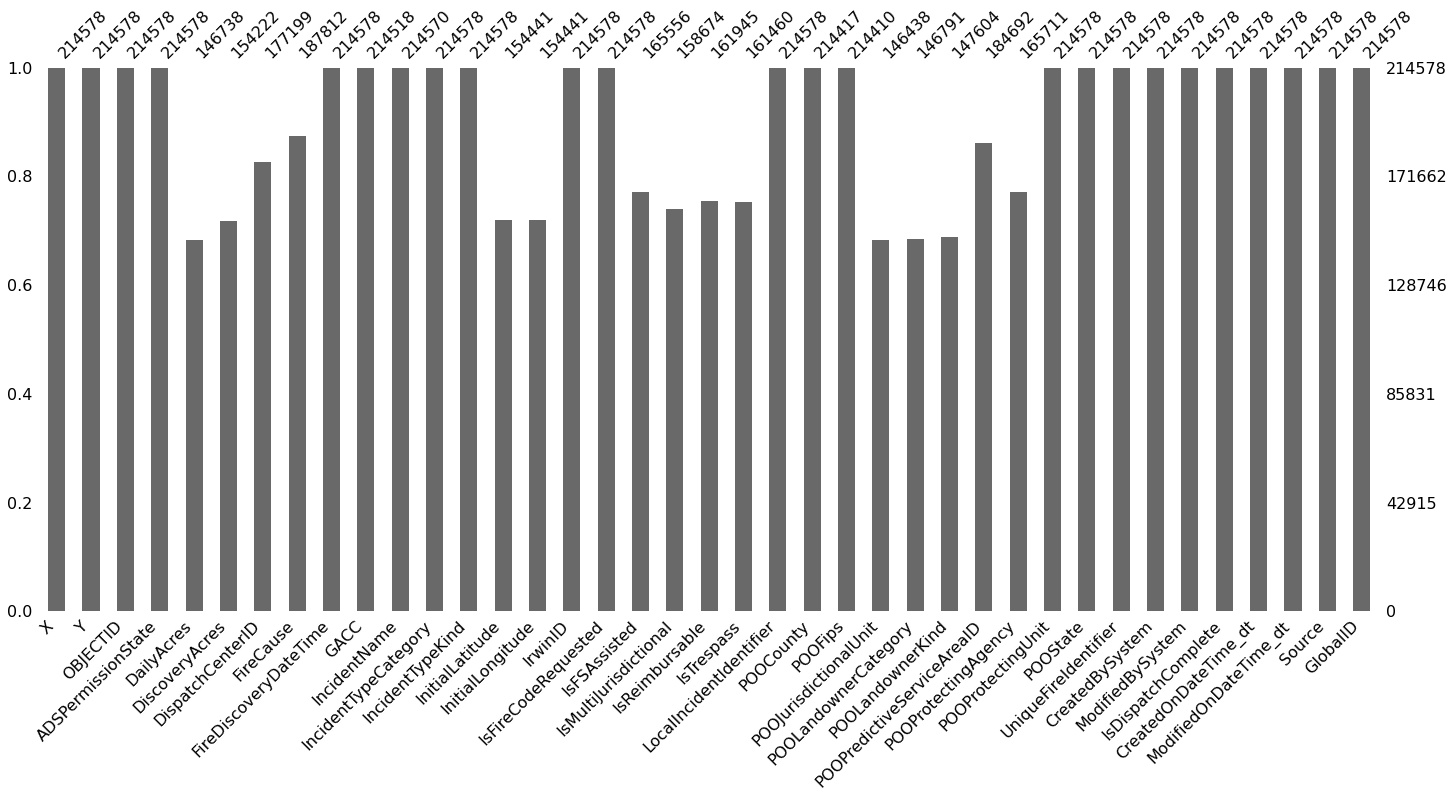

In [162]:
#Visualizing remaing column na's
msno.bar(fire_df);

In [163]:
#Looked at definition of each column to determine whether or not they were needed
fire_df.drop(columns = ['ADSPermissionState', 'DispatchCenterID', 'InitialLatitude', 
                        'InitialLongitude', 'IrwinID', 'IsTrespass', 'POOFips', 
                          'POOPredictiveServiceAreaID', 
                        'POOProtectingAgency', 'POOProtectingUnit', 'ModifiedBySystem', 
                        'IsDispatchComplete', 'Source', 'GlobalID', 'POOJurisdictionalUnit', 
                        'POOLandownerCategory', 'POOLandownerKind', 'IsReimbursable', 'IsMultiJurisdictional',
                       'IncidentTypeKind', 'IncidentTypeCategory', 'OBJECTID', 'GACC', 'LocalIncidentIdentifier',
                       'CreatedOnDateTime_dt', 'CreatedBySystem', 'ModifiedOnDateTime_dt', 'DiscoveryAcres', 'IsFireCodeRequested'], inplace = True)

## Dictionary for values dropped 
- 

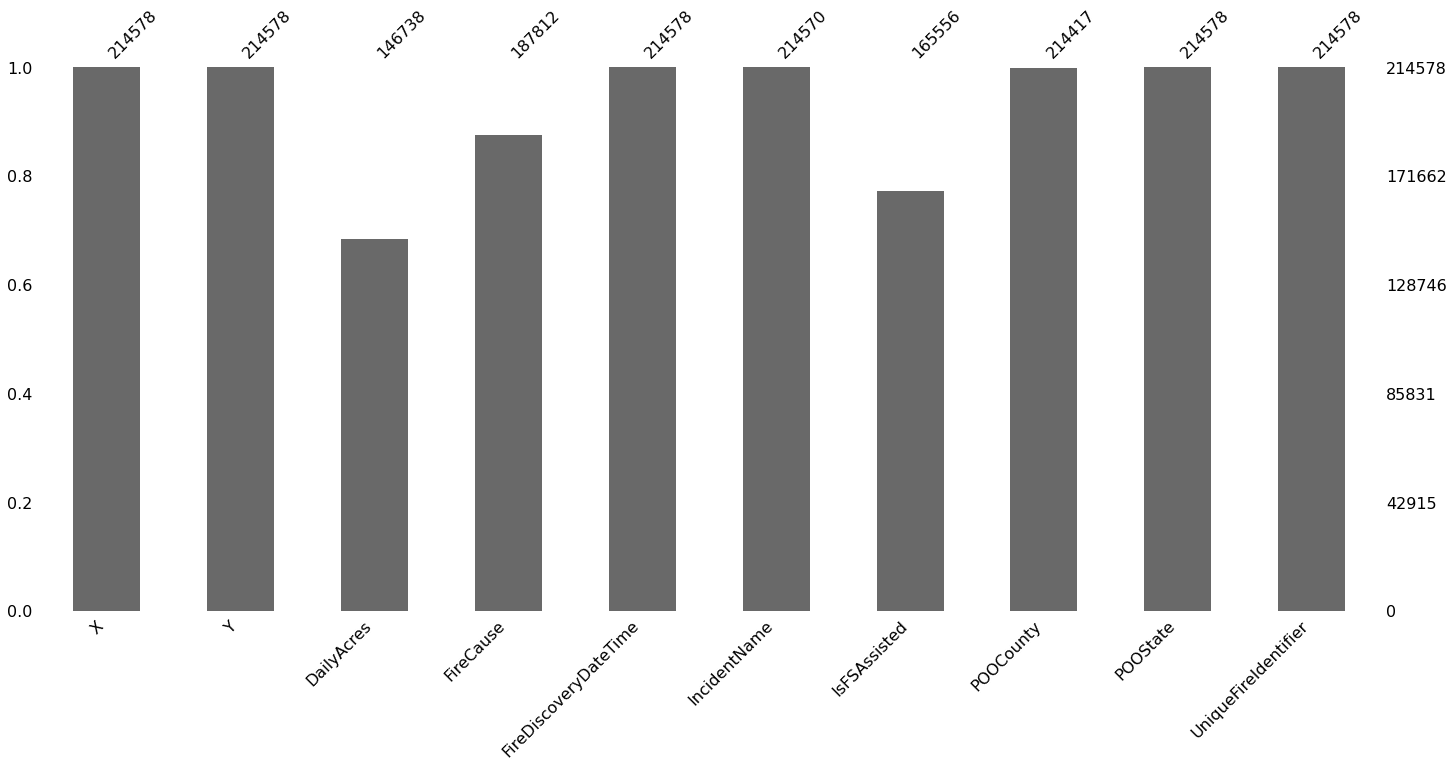

In [164]:
#Visualizing remaing column na's
msno.bar(fire_df);

In [165]:
# Trimming state columns down to just the stat abbreviation
fire_df['POOState'] = fire_df['POOState'].map(lambda x: x.strip('US-'))
fire_df.head()

X          Y  DailyAcres FireCause   FireDiscoveryDateTime  \
0 -105.563067  44.603340         NaN       NaN  2003/01/01 06:59:59+00   
1 -117.076679  34.733894         NaN       NaN  2004/07/06 01:04:00+00   
2 -116.216680  43.666673         NaN       NaN  2008/07/22 15:10:00+00   
3 -111.426912  42.096336        20.0   Unknown  2008/09/08 13:34:59+00   
4 -112.072414  34.598306         NaN   Unknown  2008/10/07 18:16:00+00   

        IncidentName  IsFSAssisted       POOCounty POOState  \
0           SCHWARTZ           1.0        Campbell       WY   
1            MENTONE           1.0  San Bernardino       CA   
2  NIFC RAMP SUPPORT           1.0             Ada       ID   
3     St. Charles RX           0.0       Bear Lake       ID   
4   Mingus/Cherry Rx           0.0         Yavapai       AZ   

  UniqueFireIdentifier  
0    2003-WYCMX-200237  
1    2004-CABDU-006784  
2    2008-IDGBK-000002  
3    2008-IDCTF-008902  
4    2008-AZPNF-000975

In [166]:
# Fixing South Dakotas state abbreviations to be SD instead of just D
fire_df['POOState'] = fire_df['POOState'].map(lambda x: 'SD' if x == 'D' else x)
# Fixing Kansas' State Abbreviation
fire_df['POOState'] = fire_df['POOState'].map(lambda x: 'KS' if x == 'K' else x)
#Utah State Abbreviation
fire_df['POOState'] = fire_df['POOState'].map(lambda x: 'UT' if x == 'T' else x)
#South Carolina
fire_df['POOState'] = fire_df['POOState'].map(lambda x: 'SC' if x == 'C' else x)
#Mississippi
fire_df['POOState'] = fire_df['POOState'].map(lambda x: 'MS' if x == 'M' else x)

In [167]:
fire_df = fire_df.rename(columns = {'X': 'lattitude', 'Y': 'longitude','FireCause': 'fire_cause',
                                    'DailyAcres': 'acres_burned', 'FireDiscoveryDateTime': 'fire_discovery_dt', 
                                   'IncidentName': 'incident_name', 'isFSAssisted': 'is_fs_assisted', 'POOCounty': 'origin_county',
                                    'POOState': 'origin_state', 'UniqueFireIdentifier': 'unique_fire_identifier'})

In [168]:
fire_df.head()

lattitude  longitude  acres_burned fire_cause       fire_discovery_dt  \
0 -105.563067  44.603340           NaN        NaN  2003/01/01 06:59:59+00   
1 -117.076679  34.733894           NaN        NaN  2004/07/06 01:04:00+00   
2 -116.216680  43.666673           NaN        NaN  2008/07/22 15:10:00+00   
3 -111.426912  42.096336          20.0    Unknown  2008/09/08 13:34:59+00   
4 -112.072414  34.598306           NaN    Unknown  2008/10/07 18:16:00+00   

       incident_name  IsFSAssisted   origin_county origin_state  \
0           SCHWARTZ           1.0        Campbell           WY   
1            MENTONE           1.0  San Bernardino           CA   
2  NIFC RAMP SUPPORT           1.0             Ada           ID   
3     St. Charles RX           0.0       Bear Lake           ID   
4   Mingus/Cherry Rx           0.0         Yavapai           AZ   

  unique_fire_identifier  
0      2003-WYCMX-200237  
1      2004-CABDU-006784  
2      2008-IDGBK-000002  
3      2008-IDCTF-008902  
4      2008-AZPNF-000975

In [169]:
fire_df.dtypes

lattitude                 float64
longitude                 float64
acres_burned              float64
fire_cause                 object
fire_discovery_dt          object
incident_name              object
IsFSAssisted              float64
origin_county              object
origin_state               object
unique_fire_identifier     object
dtype: object

In [170]:
# Creating new column for the year the fire was created
fire_df['fire_discovery_year'] = fire_df['fire_discovery_dt'].map(lambda x: x[:4])

In [171]:
#creating new column for the month the fire was created
fire_df['fire_discovery_month'] = fire_df['fire_discovery_dt'].map(lambda x: x[5:7])

In [172]:
fire_df.head()

lattitude  longitude  acres_burned fire_cause       fire_discovery_dt  \
0 -105.563067  44.603340           NaN        NaN  2003/01/01 06:59:59+00   
1 -117.076679  34.733894           NaN        NaN  2004/07/06 01:04:00+00   
2 -116.216680  43.666673           NaN        NaN  2008/07/22 15:10:00+00   
3 -111.426912  42.096336          20.0    Unknown  2008/09/08 13:34:59+00   
4 -112.072414  34.598306           NaN    Unknown  2008/10/07 18:16:00+00   

       incident_name  IsFSAssisted   origin_county origin_state  \
0           SCHWARTZ           1.0        Campbell           WY   
1            MENTONE           1.0  San Bernardino           CA   
2  NIFC RAMP SUPPORT           1.0             Ada           ID   
3     St. Charles RX           0.0       Bear Lake           ID   
4   Mingus/Cherry Rx           0.0         Yavapai           AZ   

  unique_fire_identifier fire_discovery_year fire_discovery_month  
0      2003-WYCMX-200237                2003                   01  
1      2004-CABDU-006784                2004                   07  
2      2008-IDGBK-000002                2008                   07  
3      2008-IDCTF-008902                2008                   09  
4      2008-AZPNF-000975                2008                   10

In [173]:
#Replacing NaN values for fire cause with Unknown 
fire_df['fire_cause'] = fire_df['fire_cause'].fillna('Unknown')

In [174]:
fire_df.head()

lattitude  longitude  acres_burned fire_cause       fire_discovery_dt  \
0 -105.563067  44.603340           NaN    Unknown  2003/01/01 06:59:59+00   
1 -117.076679  34.733894           NaN    Unknown  2004/07/06 01:04:00+00   
2 -116.216680  43.666673           NaN    Unknown  2008/07/22 15:10:00+00   
3 -111.426912  42.096336          20.0    Unknown  2008/09/08 13:34:59+00   
4 -112.072414  34.598306           NaN    Unknown  2008/10/07 18:16:00+00   

       incident_name  IsFSAssisted   origin_county origin_state  \
0           SCHWARTZ           1.0        Campbell           WY   
1            MENTONE           1.0  San Bernardino           CA   
2  NIFC RAMP SUPPORT           1.0             Ada           ID   
3     St. Charles RX           0.0       Bear Lake           ID   
4   Mingus/Cherry Rx           0.0         Yavapai           AZ   

  unique_fire_identifier fire_discovery_year fire_discovery_month  
0      2003-WYCMX-200237                2003                   01  
1      2004-CABDU-006784                2004                   07  
2      2008-IDGBK-000002                2008                   07  
3      2008-IDCTF-008902                2008                   09  
4      2008-AZPNF-000975                2008                   10

In [175]:
fire_df['fire_cause'].isnull().sum()

0

In [176]:
fire_df['origin_state'].value_counts().sort_values(ascending = True)

MX-CH        1
CA-YT        1
MX-CA        1
MX-SO        1
CA-SK        2
         ...  
WA       10988
OR       14237
MT       14951
AZ       15829
CA       47809
Name: origin_state, Length: 62, dtype: int64

In [177]:
#locating observations that are not in the States (there were 257)
state_list = ['WY', 'CA', 'ID', 'AZ', 'TX', 'CO', 'MN', 'UT', 'WI', 'MT', 'SC', 'NV', 'OR', 'NM', 'FL', 'AK', 'KY', 'IA', 'PA', 'WA', 'OK', 'SD', 'MS', 'AR',
 'ND', 'NY', 'LA', 'MI', 'GA', 'NC', 'TN', 'NE', 'NJ', 'VA', 'NH', 'KS', 'AL', 'IL', 'MO', 'HI', 'ME', 'WV', 'OH', 'MD', 'MA', 'IN', 'VT', 'DC', 'CT', 'DE']
removal_states = []


for i in fire_df.origin_state:
    if i not in state_list:
        removal_states.append(i)


In [178]:
#Removing observations not in the states
remove_state_list = list(fire_df.loc[fire_df['origin_state'].isin(removal_states)].index) #Creating list of index's that do not have state within US
fire_df.drop(remove_state_list, inplace = True)

In [179]:
fire_df['acres_burned'].isnull().sum()

67774

In [180]:
# grabbing the average acres burned by month for each state and putting into dictionary
x = dict(fire_df.groupby(['origin_state', 'fire_discovery_month'])['acres_burned'].mean())
# Finding all observations where acres burned is null and putting them into a list
nan_list = list(fire_df.loc[fire_df['acres_burned'].isnull()].index)


#Looping through all rows where acres_burned is null and replacing with the states average acres burned for that particular month
for i in nan_list:
    # Grabbing the stat of a particular index from the nan list
    state = fire_df.loc[i].origin_state
    # Grabbing month of a particular index from the nan list
    month = fire_df.loc[i].fire_discovery_month
    # Grabbing the average acres burned for the state and month that was retrieved above
    acres_burned = x.get((str(state),month))
    # Filling nan value with that states average acres burned for that particular month
    fire_df.at[i, 'acres_burned'] = acres_burned  

In [181]:
fire_df['acres_burned'].isnull().sum()

20

In [182]:
# Dropping the remaining 28 observations that didn't get filled in 
nan_list = list(fire_df.loc[fire_df['acres_burned'].isnull()].index)
fire_df.drop(nan_list, inplace = True)

In [183]:
fire_df['acres_burned'].isnull().sum()

0

In [184]:
#Identifying duplicate fire entries
fire_df[fire_df['unique_fire_identifier'].duplicated(keep=False)].head()

lattitude  longitude  acres_burned    fire_cause  \
442  -86.914106  45.921409      0.100000         Human   
542  -88.449706  45.258308    108.882455       Unknown   
543  -88.444706  45.252208    110.000000         Human   
565 -120.237013  37.657205    677.000000  Undetermined   
567 -120.142013  37.568905    122.406459       Unknown   

          fire_discovery_dt incident_name  IsFSAssisted origin_county  \
442  2014/05/24 15:43:59+00     Road fire           NaN         Delta   
542  2014/05/26 18:00:00+00    SNOW FALLS           0.0        Oconto   
543  2014/05/26 18:00:00+00    SNOW FALLS           0.0        Oconto   
565  2014/05/26 22:30:00+00        Hunter           NaN      Mariposa   
567  2014/05/26 22:36:00+00        HUNTER           1.0      Mariposa   

    origin_state unique_fire_identifier fire_discovery_year  \
442           MI      2014-MIHIF-000005                2014   
542           WI      2014-WICNF-140010                2014   
543           WI      2014-WICNF-140010                2014   
565           CA      2014-CAMMU-008974                2014   
567           CA      2014-CAMMU-008974                2014   

    fire_discovery_month  
442                   05  
542                   05  
543                   05  
565                   05  
567                   05

In [185]:
#Dropping duplicate fire incidents based on unique fire identifier
fire_df.drop_duplicates(subset = ['unique_fire_identifier'], inplace = True)

In [186]:
fire_df.shape

(213787, 12)

In [195]:
fire_df['IsFSAssisted'].fillna(0, inplace = True)


In [196]:
fire_df.isnull().sum()

lattitude                 0
longitude                 0
acres_burned              0
fire_cause                0
fire_discovery_dt         0
incident_name             8
IsFSAssisted              0
origin_county             0
origin_state              0
unique_fire_identifier    0
fire_discovery_year       0
fire_discovery_month      0
dtype: int64

In [197]:
fire_df['incident_name'].fillna('unknown', inplace = True)

In [198]:
fire_df.isnull().sum()

lattitude                 0
longitude                 0
acres_burned              0
fire_cause                0
fire_discovery_dt         0
incident_name             0
IsFSAssisted              0
origin_county             0
origin_state              0
unique_fire_identifier    0
fire_discovery_year       0
fire_discovery_month      0
dtype: int64

In [200]:
fire_df.set_index('unique_fire_identifier', inplace = True)

In [201]:
fire_df.head()

lattitude  longitude  acres_burned fire_cause  \
unique_fire_identifier                                                   
2003-WYCMX-200237      -105.563067  44.603340    139.091837    Unknown   
2004-CABDU-006784      -117.076679  34.733894   1906.698008    Unknown   
2008-IDGBK-000002      -116.216680  43.666673    685.728842    Unknown   
2008-IDCTF-008902      -111.426912  42.096336     20.000000    Unknown   
2008-AZPNF-000975      -112.072414  34.598306     77.946287    Unknown   

                             fire_discovery_dt      incident_name  \
unique_fire_identifier                                              
2003-WYCMX-200237       2003/01/01 06:59:59+00           SCHWARTZ   
2004-CABDU-006784       2004/07/06 01:04:00+00            MENTONE   
2008-IDGBK-000002       2008/07/22 15:10:00+00  NIFC RAMP SUPPORT   
2008-IDCTF-008902       2008/09/08 13:34:59+00     St. Charles RX   
2008-AZPNF-000975       2008/10/07 18:16:00+00   Mingus/Cherry Rx   

                        IsFSAssisted   origin_county origin_state  \
unique_fire_identifier                                              
2003-WYCMX-200237                1.0        Campbell           WY   
2004-CABDU-006784                1.0  San Bernardino           CA   
2008-IDGBK-000002                1.0             Ada           ID   
2008-IDCTF-008902                0.0       Bear Lake           ID   
2008-AZPNF-000975                0.0         Yavapai           AZ   

                       fire_discovery_year fire_discovery_month  
unique_fire_identifier                                           
2003-WYCMX-200237                     2003                   01  
2004-CABDU-006784                     2004                   07  
2008-IDGBK-000002                     2008                   07  
2008-IDCTF-008902                     2008                   09  
2008-AZPNF-000975                     2008                   10

In [204]:
# fire_df.to_csv('../data/cleaned_fire_data.csv')